In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00


In [2]:
import torch, os, platform
!nvidia-smi
print("Torch:", torch.__version__, "CUDA available:", torch.cuda.is_available())

Fri Sep 19 02:55:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import cv2
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import yaml
import zipfile
from ultralytics import YOLO
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!unzip -o /content/archive.zip -d /content/license-plate-dataset
!ls -R /content/license-plate-dataset | head -40


Streaming output truncated to the last 5000 lines.
  inflating: /content/license-plate-dataset/labels/train/0b8ccc48f8249011.txt  
  inflating: /content/license-plate-dataset/labels/train/0bb0243e342a5ae5.txt  
  inflating: /content/license-plate-dataset/labels/train/0bbc4d4373271986.txt  
  inflating: /content/license-plate-dataset/labels/train/0bc16a671c17f17d.txt  
  inflating: /content/license-plate-dataset/labels/train/0bc35d4b747c7d84.txt  
  inflating: /content/license-plate-dataset/labels/train/0bc49bac8978eed9.txt  
  inflating: /content/license-plate-dataset/labels/train/0bcb1b755eb8f211.txt  
  inflating: /content/license-plate-dataset/labels/train/0bf6924e28109d79.txt  
  inflating: /content/license-plate-dataset/labels/train/0c0ac55f447972cd.txt  
  inflating: /content/license-plate-dataset/labels/train/0c0f17576a1c3f6d.txt  
  inflating: /content/license-plate-dataset/labels/train/0c21585974c2fee4.txt  
  inflating: /content/license-plate-dataset/labels/train/0c29f092c883

In [5]:
from ultralytics import YOLO
import os, yaml

dataDir  = "/content/license-plate-dataset"
data_yaml = {
    "path": dataDir,
    "train": "images/train",
    "val":   "images/val",
    "names": {0: "license-plate"}
}
yaml_path = os.path.join(dataDir, "data.yaml")
with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f, sort_keys=False)

model = YOLO("yolov8n.pt")

results = model.train(
    data=yaml_path,
    epochs=10,
    imgsz=512,
    lr0=1e-4,
    lrf=0.01,
    dropout=0.25,
    batch=-1,
    device=0,
    workers=2,
    seed=120,
    cache=True,
)



Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/license-plate-dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

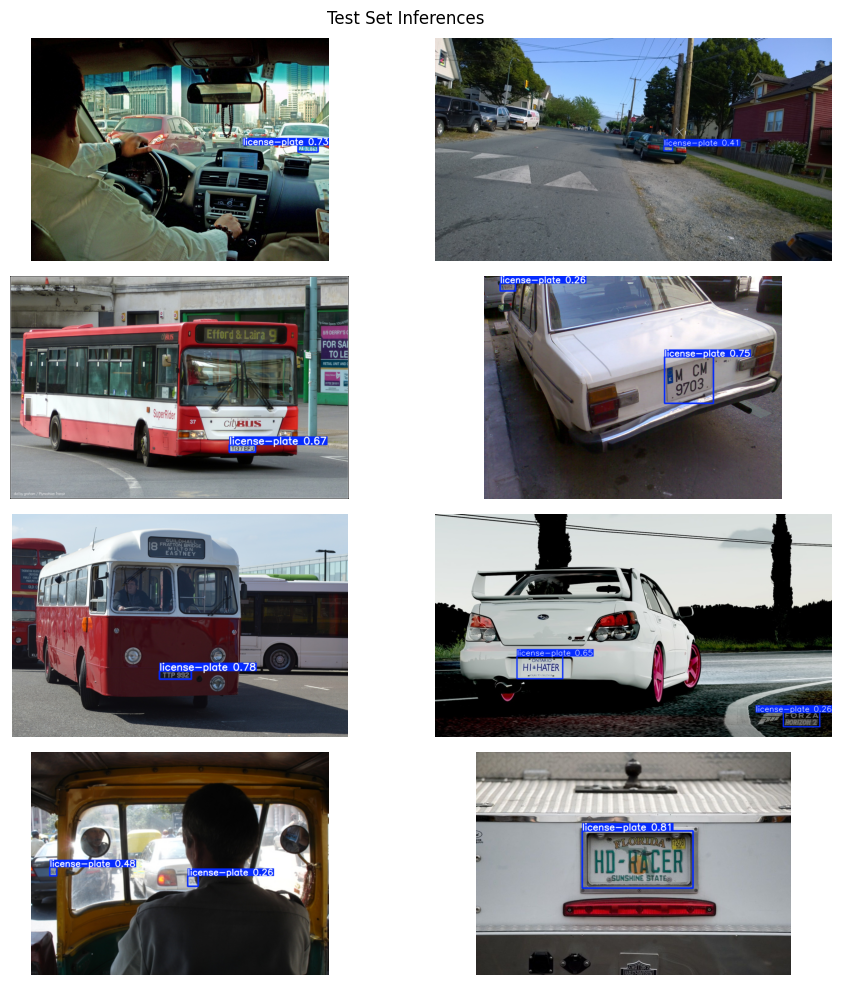

In [11]:
validImagePath = os.path.join(dataDir, "images", "val")

imageFiles = [f for f in os.listdir(validImagePath) if f.lower().endswith(('.jpg','.jpeg','.png'))]

if len(imageFiles) >= 1:
    numImages = len(imageFiles)
    step = max(1, numImages // 9)
    selectedImage = [imageFiles[i] for i in range(0, numImages, step)][:9]

    fig, axes = plt.subplots(4, 2, figsize=(10, 10))
    fig.suptitle('Test Set Inferences')

    for i, ax in enumerate(axes.flatten()):
        imagePath = os.path.join(validImagePath, selectedImage[i])
        pred = model.predict(source=imagePath, imgsz=640, verbose=False)
        annotated = pred[0].plot()
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
        ax.imshow(annotated_rgb)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in test folder.")


In [7]:
metrics = model.val()

print(metrics)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 35.5±20.5 MB/s, size: 281.1 KB)
val: Scanning /content/license-plate-dataset/labels/val.cache... 1073 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1073/1073 2.0Mit/s 0.0s
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
val: Caching images (0.6GB RAM): 100% ━━━━━━━━━━━━ 1073/1073 87.6it/s 12.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 1.3it/s 9.5s
                   all       1073       1573      0.867      0.713       0.79      0.422
Speed: 0.5ms preprocess, 2.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics